In [1]:
#import needed packege
import numpy as np
import math
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline


In [3]:
#load data
data = np.loadtxt('GMDataSet_HW7.txt')

In [4]:
class GMM:
    def _init_(self,)

(1000, 5)


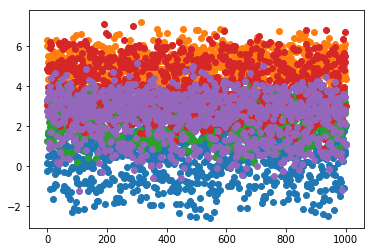